In [1]:
import tensorflow as tf
import keras

from keras import datasets, layers, models, utils

import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

Loading Dataset

In [2]:
test_ds, test_dataset_info = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True, shuffle_files=True, split = 'train[10%:20%]')
train_ds, train_dataset_info = tfds.load('cats_vs_dogs', as_supervised=True, with_info=True, shuffle_files=True, split = 'train[:20%]')

print("Train Split Length: {}".format(len(train_ds)))

print("Test Split Length: {}".format(len(test_ds)))
#x_data = list(train_ds)



Train Split Length: 4652
Test Split Length: 2326


Dataset Info

In [3]:
class_names = ['cat', 'dog']

BATCH_SIZE = 8

x_data = []
x_labels = []

for image, label in train_ds:
  #print(image.shape)
  x_data.append(tf.image.resize(image, [200, 200])/255)
  x_labels.append(label)
  #print(resized_images[0].shape)
  #break

x_data = np.array(x_data)
x_labels = np.array(x_labels)



In [11]:
y_data = []
y_labels = []

for image, label in test_ds:
  #print(image.shape)
  y_data.append(tf.image.resize(image, [200, 200])/255)
  y_labels.append(label)
  #break

y_data = np.array(y_data)
y_labels = np.array(y_labels)



Visualize Image

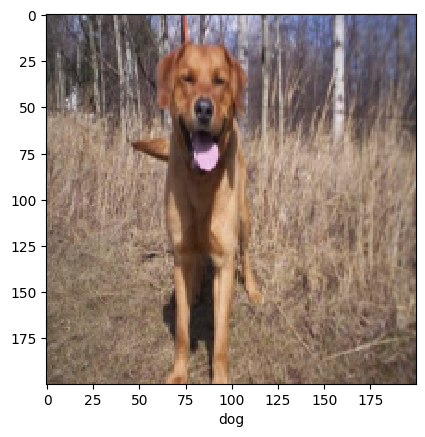

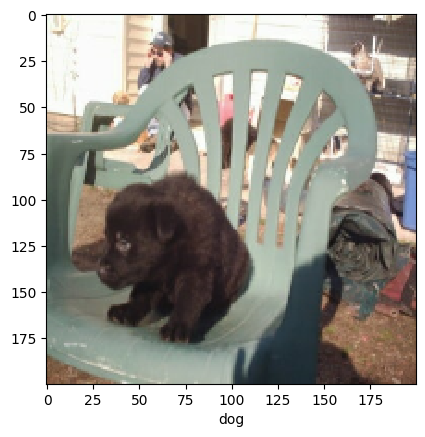

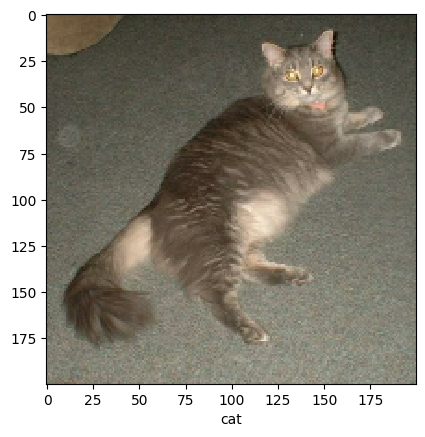

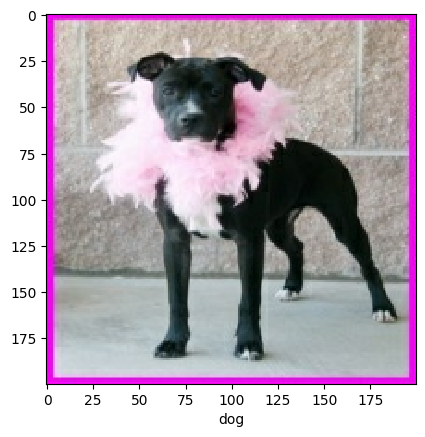

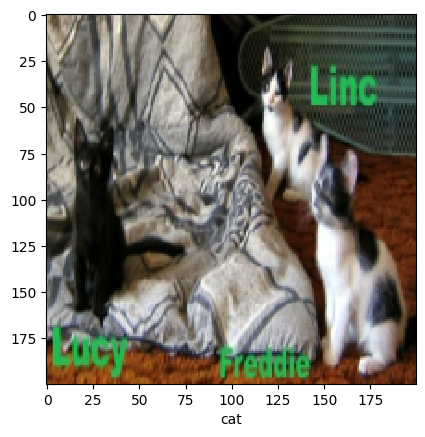

In [4]:
for i in range(5):
  plt.imshow(x_data[i], interpolation='nearest')
  plt.xlabel(class_names[x_labels[i]])
  plt.show()

  #print(image[0])




Test: Pretrained Xception Model

In [ ]:
base_model = keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(200, 200, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

base_model.trainable = False

inputs = keras.layers.Input(shape=(200, 200, 3))

x = base_model(inputs, training=False)

x = keras.layers.GlobalAveragePooling2D()(x)

x = keras.layers.Dropout(0.2)(x)

outputs = keras.layers.Dense(1)(x)

base_model = keras.Model(inputs, outputs)

base_model.compile(optimizer=keras.optimizers.Adam(),
              loss=keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=[keras.metrics.BinaryAccuracy()])
base_model.fit(x_data, x_labels, epochs=10, batch_size = BATCH_SIZE)



Epoch 1/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 859s 3s/step - binary_accuracy: 0.9223 - loss: 0.2036
Epoch 2/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 850s 3s/step - binary_accuracy: 0.9858 - loss: 0.0466
Epoch 3/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 861s 3s/step - binary_accuracy: 0.9898 - loss: 0.0376
Epoch 4/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 845s 3s/step - binary_accuracy: 0.9908 - loss: 0.0299
Epoch 5/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 839s 3s/step - binary_accuracy: 0.9949 - loss: 0.0233
Epoch 6/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 863s 3s/step - binary_accuracy: 0.9911 - loss: 0.0243
Epoch 7/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 862s 3s/step - binary_accuracy: 0.9957 - loss: 0.0182
Epoch 8/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 838s 3s/step - binary_accuracy: 0.9916 - loss: 0.0197
Epoch 9/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 838s 3s/step - binary_accuracy: 0.9932 - loss: 0.0208
Epoch 10/10
291/291 ━━━━━━━━━━━━━━━━━━━━ 828s 3s/step - binary_accuracy: 0.9958 - loss: 0.0139


In [ ]:
test_loss, test_acc = base_model.evaluate(y_data, y_labels)

print("Test Accuracy: {}".format(test_acc))
print("Test Loss: {}".format(test_loss))

73/73 ━━━━━━━━━━━━━━━━━━━━ 419s 6s/step - binary_accuracy: 0.9982 - loss: 0.0089
Test Accuracy: 0.9978503584861755
Test Loss: 0.00998737569898367


In [ ]:
base_model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 200, 200, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ xception (Functional)                │ (None, 7, 7, 2048)          │      20,861,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 2048)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │           2,049 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,867,629 (79.60 MB)

 Trainable params: 2,049 (8.00 KB)

 Non-trainable params: 20,861,480 (79.58 MB)

 Optimizer params: 4,100 (16.02 KB)

Custom CNN Model

In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(200,200,3)))
model.add(layers.Flatten())
model.add(keras.layers.BatchNormalization())
model.add(layers.Dense(2))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 198, 198, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1254528)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1254528)             │       5,018,112 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 2)                   │       2,509,058 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 2)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,566,104 (67.01 MB)

 Trainable params: 5,019,014 (19.15 MB)

 Non-trainable params: 2,509,060 (9.57 MB)

 Optimizer params: 10,038,030 (38.29 MB)

In [7]:
print("Shape of resized_images:", x_data.shape)
print("Shape of x_labels:", x_labels.shape)

Shape of resized_images: (4652, 200, 200, 3)
Shape of x_labels: (4652,)


In [10]:
#model.compile(optimizer=keras.optimizers.Adam(),
#              loss=keras.losses.BinaryCrossentropy(from_logits=True),
#              metrics=[keras.metrics.BinaryAccuracy()])

model.compile(optimizer = 'Adam', loss = 'crossentropy', metrics=['accuracy'])


model.fit(x_data, x_labels, epochs=20, batch_size = BATCH_SIZE)


Epoch 1/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 291s 495ms/step - accuracy: 0.5330 - loss: 0.7968
Epoch 2/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 318s 489ms/step - accuracy: 0.6152 - loss: 0.6467
Epoch 3/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 327s 498ms/step - accuracy: 0.6534 - loss: 0.6195
Epoch 4/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 317s 491ms/step - accuracy: 0.7116 - loss: 0.5586
Epoch 5/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 324s 494ms/step - accuracy: 0.8007 - loss: 0.4456
Epoch 6/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 290s 497ms/step - accuracy: 0.8665 - loss: 0.3479
Epoch 7/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 320s 494ms/step - accuracy: 0.9090 - loss: 0.2559
Epoch 8/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 314s 480ms/step - accuracy: 0.9376 - loss: 0.1987
Epoch 9/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 331s 495ms/step - accuracy: 0.9453 - loss: 0.1870
Epoch 10/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 323s 497ms/step - accuracy: 0.9598 - loss: 0.1418
Epoch 11/20
582/582 ━━━━━━━━━━━━━━━━━━━━ 323s 499ms/step - accuracy: 0.9458 - loss: 0.1543
Epoch 12

In [13]:
test_loss, test_acc = model.evaluate(y_data, y_labels)

print("Test Accuracy: {}".format(test_acc))
print("Test Loss: {}".format(test_loss))

73/73 ━━━━━━━━━━━━━━━━━━━━ 28s 382ms/step - accuracy: 0.9955 - loss: 0.0230
Test Accuracy: 0.9957007765769958
Test Loss: 0.02841779589653015
